In [ ]:
%pyplot inline
%matplotlib inline

from __future__ import print_function
from __future__ import division

import cartopy
from cartopy.io import shapereader

import itertools
import unidecode

import sys
import pandas

In [6]:
map_name = shapereader.natural_earth(resolution = '10m', category = 'cultural', name = 'admin_1_states_provinces')
naturalearth = shapereader.Reader(map_name)

In [7]:
states = [(x, y) for x, y in zip(naturalearth.records(), naturalearth.geometries()) if x.attributes['admin'] == 'Mexico']

# The Plotting

In [8]:
from cartopy import crs
from matplotlib import pyplot
import seaborn
import matplotlib

In [9]:
pyplot.rcParams['figure.figsize'] = (20.0, 10.0)

In [10]:
mexico = reduce(lambda x, y: x.union(y), [y for _, y in states])
coords = mexico.convex_hull.exterior.coords.xy
minx, miny, maxx, maxy = min(coords[0]), max(coords[0]), min(coords[1]), max(coords[1])

In [11]:
# incomes = {' '.join(itertools.takewhile(bool, x.split(' '))): float(x.rsplit(' ', 1)[-1]) for x in incomes_text.split('\n')}
incomes = {
    'AGUASCALIENTES': 8579.801608,
    'BAJA CALIFORNIA': 8030.011972,
    'BAJA CALIFORNIA SUR': 7498.257268,
    'CAMPECHE': 12007.396774,
    'CHIAPAS': 9564.70468,
    'CHIHUAHUA': 7501.694956,
    'COAHUILA': 10967.814392,
    'COLIMA': 9925.865928,
    'DESCONOCIDO': 9035.330754,
    'DISTRITO FEDERAL': 11437.520063,
    'DURANGO': 7585.323217,
    'MEXICO': 9238.380049,
    'GUANAJUATO': 9419.514229,
    'GUERRERO': 10944.836727,
    'HIDALGO': 10232.028463,
    'JALISCO': 12041.236405,
    'MICHOACAN': 8954.996844,
    'MORELOS': 10457.079586,
    'NAYARIT': 10069.586706,
    'NUEVO LEON': 12258.573142,
    'OAXACA': 10158.02869,
    'PUEBLA': 11388.835235,
    'QUERETARO': 10528.81912,
    'QUINTANA ROO': 9209.025014,
    'SAN LUIS POTOSI': 9531.259014,
    'SINALOA': 8967.592437,
    'SONORA': 8197.731229,
    'TABASCO': 9799.170006,
    'TAMAULIPAS': 9591.725217,
    'TLAXCALA': 12194.392625,
    'VERACRUZ': 10918.556445,
    'YUCATAN': 9908.086203,
    'ZACATECAS': 8190.607426
}

In [31]:
max(x[::-1] for x in incomes.iteritems())

(12258.573142, 'NUEVO LEON')

In [33]:
pandas.Series(incomes).sort_values(ascending = False)

NUEVO LEON             12258.573142
TLAXCALA               12194.392625
JALISCO                12041.236405
CAMPECHE               12007.396774
DISTRITO FEDERAL       11437.520063
PUEBLA                 11388.835235
COAHUILA               10967.814392
GUERRERO               10944.836727
VERACRUZ               10918.556445
QUERETARO              10528.819120
MORELOS                10457.079586
HIDALGO                10232.028463
OAXACA                 10158.028690
NAYARIT                10069.586706
COLIMA                  9925.865928
YUCATAN                 9908.086203
TABASCO                 9799.170006
TAMAULIPAS              9591.725217
CHIAPAS                 9564.704680
SAN LUIS POTOSI         9531.259014
GUANAJUATO              9419.514229
MEXICO                  9238.380049
QUINTANA ROO            9209.025014
DESCONOCIDO             9035.330754
SINALOA                 8967.592437
MICHOACAN               8954.996844
AGUASCALIENTES          8579.801608
SONORA                  8197

In [19]:
states[2][0].attributes['name']

'Baja California Sur'

In [207]:
pyplot.rcParams['figure.figsize'] = 12, 16

In [ ]:
crs.

In [234]:
import locale

In [238]:
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

'en_US.utf8'

AttributeError: 'function' object has no attribute 'create_dummy_axis'

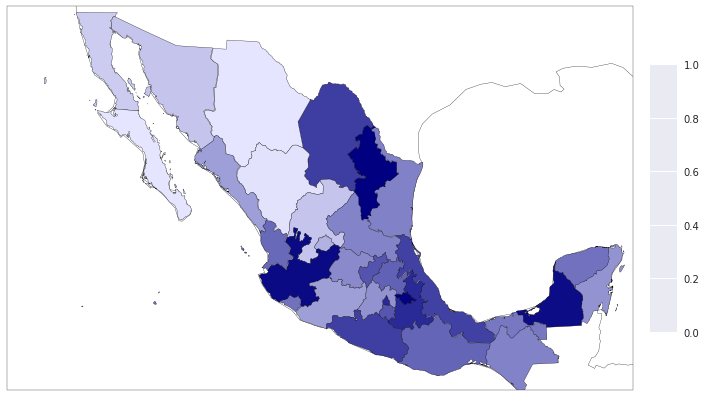

In [241]:
def value(income):
    return int(income) - int(min(incomes.values()))

ax = pyplot.axes(projection=crs.Orthographic(central_latitude = 19.4326, central_longitude = -99.1332))
ax.coastlines()
ax.set_extent([minx, miny, maxx, maxy])

palette = seaborn.light_palette('Navy', int(max(incomes.values()) - min(incomes.values())) + 1)
p_cmap = seaborn.light_palette('Navy', int(max(incomes.values()) - min(incomes.values())) + 1, as_cmap = True)
# palette = seaborn.color_palette('GnBu', int(max(incomes.values())) - int(min(incomes.values())) + 1)

colors = []
for record, geometry in states:
    name = unidecode.unidecode(record.attributes['name'].decode('utf-8')).upper()
    
    if name not in incomes.keys():
        # print('Warning: "{}" not in incomes'.format(name), file = sys.stderr)
        continue
    
    color = value(incomes[name])
    colors.append(color)
    ax.add_geometries(
        [geometry],
        crs.PlateCarree(),
        facecolor = palette[color],
        edgecolor = 'black',
        label = record.attributes['gns_name']
    )

m = cm.ScalarMappable(cmap = p_cmap)
m.set_array(incomes.values())
# m.autoscale()
pyplot.colorbar(m, orientation = 'vertical', format = lambda x: locale.format('%d'), pad = .025, fraction = .04, aspect = 10)

pyplot.savefig('regions.png', bbox_inches = 'tight')

# Whitespace

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

